In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
df = pd.read_csv("/s_home/rb577/Downloads/diabetic_data/diabetic_data/diabetic_data.csv")
df.head(3)

df.shape

df.replace('?', np.nan, inplace = True)

df.head(3)
df.shape

count = int(0.5*df.shape[0] + 1)
df = df.dropna(axis=1,thresh=count)

df.head(3)
df.shape

df['age'] = df['age'].str.extract('(\d+)-(\d+)').astype('int').median(axis=1).astype('int')

df.head(3)

df.isnull().sum()

df.dtypes

df.isnull().sum()

df['diag_1']=df['diag_1'].replace(np.nan, '0', inplace = False)

df.isnull().sum()

df['diag_2']=df['diag_2'].fillna(0)

df['diag_3']=df['diag_3'].fillna(0)

df.isnull().sum()
df.shape

df = df.dropna(axis=0, how='any', inplace=False)

df.shape

numerics = df.select_dtypes(include=np.number).columns.tolist()
df_n = numerics = df.select_dtypes(include=np.number)
categories = df.select_dtypes(exclude = np.number).columns.tolist()
categories




for i in df_n:
    u =  df[i].mean() + 3*df[i].std()
    l =  df[i].mean() - 3*df[i].std()
    df_u = df[df_n[i] < u] 
    df_l = df[df_n[i] > l]

df_new = pd.merge(df_u,df_l)

df_new.shape

df_new = df_new.drop_duplicates(subset = ['patient_nbr'])

df_new.shape

(19696, 49)

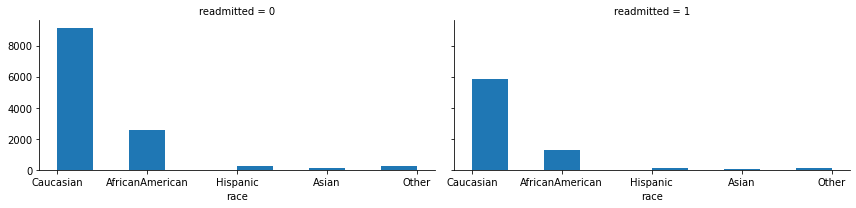

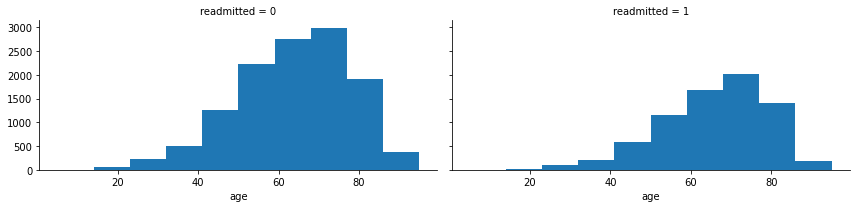

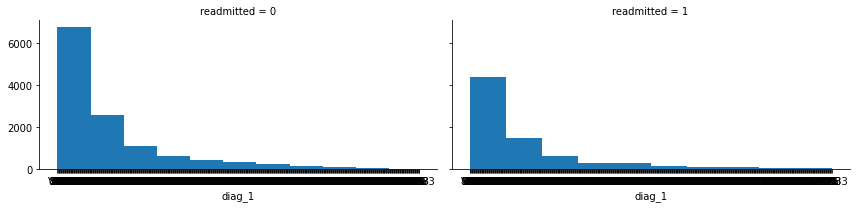

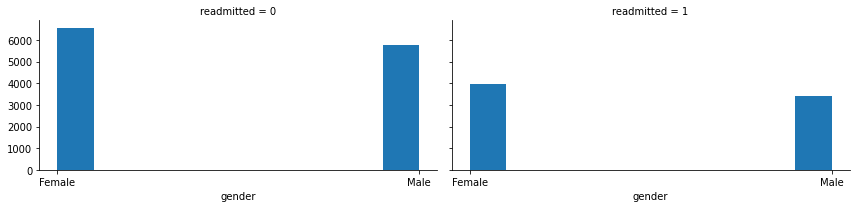

In [44]:
df_new.head(3)

df_new['readmitted'].replace('NO', '0', inplace = True)

df_new['readmitted'].mask(df_new['readmitted'] != '0', 1, inplace=True)

df_new['readmitted']

def cond_hists(df, plot_cols, grid_col):  
    for col in plot_cols:
        g = sns.FacetGrid(df, col=grid_col, margin_titles=True, aspect=2.)
        g.map(plt.hist, col)
    plt.show() 
plot_cols2 = ["race",
               "age",
               "diag_1",
               "gender"]
cond_hists(df_new, plot_cols2, "readmitted")

In [133]:
col1 = ["readmitted"]
col2 = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital','number_inpatient','age','num_lab_procedures', 'number_diagnoses','num_procedures','encounter_id']
x = df_new[col2].values.astype('int')
y = df_new[col1].values.astype('int')

print("X: ",X.shape)
print("Y: ",y.shape)

X:  (27140, 10)
Y:  (19696, 1)


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)
clf.fit(x_train, y_train)
print("Score against training data: {}".format(clf.score(x_train, y_train)))
print("Score against test data: {}".format(clf.score(x_test, y_test)))

Score against training data: 0.628078192434628
Score against test data: 0.6154822335025381


/s_home/rb577/PycharmProjects/bigdata/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
from sklearn import linear_model, preprocessing
clf = linear_model.LogisticRegression()
X = df[col2]
Y = df['readmitted']
clf.fit(X, Y)
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))

Model score:
 0.568680913780398
Intercept:
 [-3.98912660e-17  5.38042509e-19  3.93532235e-17]


In [61]:
def matrix(y_test, y_pred)->float:
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",linewidths=2)
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score

In [62]:
def clas(classifier, X_train=X_train, y_train=y_train,X_test=X_test, y_test=y_test)->float:
    y_pred = classifier.predict(X_test)
    acc_score = matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

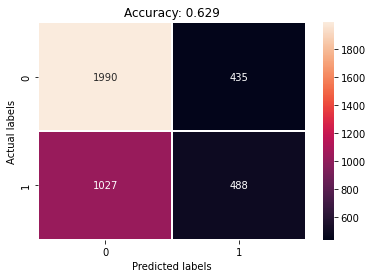

              precision    recall  f1-score   support

           0       0.66      0.82      0.73      2425
           1       0.53      0.32      0.40      1515

    accuracy                           0.63      3940
   macro avg       0.59      0.57      0.57      3940
weighted avg       0.61      0.63      0.60      3940



In [63]:
xgb_clf = XGBClassifier(use_label_encoder=False,verbosity=0)
xgb_clf = xgb_clf.fit(x_train,y_train)
xgb_acc = clas(xgb_clf)

In [68]:
def kfold(clf, X_train=X_train, y_train=y_train)->(float, float):
    score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10 )#number of folds
    mean = score.mean()
    std = score.std()
    print(f"Mean Accuracy for : {mean*100:0.3f} %")
    print(f"Standard Deviation : {std*100:0.3f} %")
    return mean, std

In [102]:
print("Mean Accuracy for XGB classifier")
kfold(xgb_clf)

Mean Accuracy for XGB classifier
Mean Accuracy for : 64.763 %
Standard Deviation : 1.298 %


(0.647627104987511, 0.012981420617580532)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =2,)
model.fit(x,y)

KMeans(n_clusters=2)

Text(0, 0.5, 'number_inpatient')

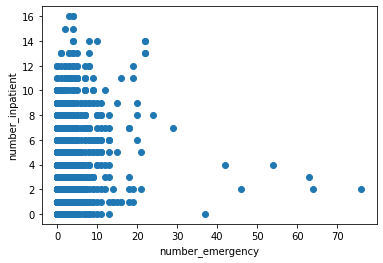

In [129]:
k = model.predict(X_test)
plt.scatter(df_n.number_emergency,df_n['number_inpatient'])
plt.xlabel('number_emergency')
plt.ylabel('number_inpatient')

In [130]:
y_pred = model.fit_predict(df_n[['number_emergency','number_inpatient']])
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [131]:
df_n['cluster']=y_pre
df_n.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,clust,clusters,cluster
20446,72091308,20123568,75,1,22,7,7,58,2,15,0,0,0,9,0,0,0
20737,72848634,20377854,65,2,1,1,3,59,3,11,0,0,0,6,0,0,0
20824,73062156,20408121,95,1,1,7,4,56,1,9,0,0,0,6,0,0,0
21083,73731852,20542797,75,1,2,7,10,68,1,18,0,0,0,6,0,0,0
23879,81355914,7239654,75,1,3,6,12,77,5,19,0,0,0,5,0,0,0


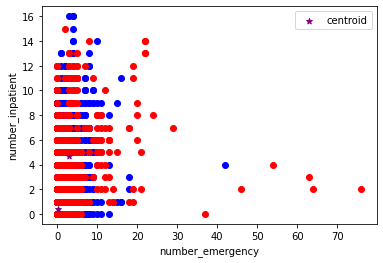

In [132]:
data1 = df_n[df_n.cluster==0]
data2 = df_n[df_n.cluster==1]
data3 = df_n[df_n.cluster==2]
plt.scatter(data1.number_emergency,data1['number_inpatient'],color='blue')
plt.scatter(data2.number_emergency,data2['number_inpatient'],color='red')
plt.scatter(data3.number_emergency,data3['number_inpatient'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('number_emergency')
plt.ylabel('number_inpatient')
plt.legend()